In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Logistic Regression Function

In [64]:
def logreg (X_train, X_test, y_test, y_train):
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import roc_curve, auc

    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    y_pred_proba = logreg.predict_proba(X_test)[:, 1]
    [fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
    print(" auc is %2.3f" % auc(fpr, tpr))

    idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

    plt.figure()
    plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
    plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
    plt.ylabel('True Positive Rate (recall)', fontsize=14)
    plt.title('Receiver operating characteristic (ROC) curve')
    plt.legend(loc="lower right")
    plt.show()


# Preprocessing Data

In [65]:
df = pd.read_csv('apply_rate_2019.csv')

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200890 entries, 0 to 1200889
Data columns (total 10 columns):
title_proximity_tfidf          948319 non-null float64
description_proximity_tfidf    948319 non-null float64
main_query_tfidf               1200890 non-null float64
query_jl_score                 1200890 non-null float64
query_title_score              1200890 non-null float64
city_match                     944335 non-null float64
job_age_days                   1200890 non-null float64
apply                          1200890 non-null int64
search_date_pacific            1200890 non-null object
class_id                       1200890 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 91.6+ MB


In [67]:
df.head().transpose()

,0,1,2,3,4
title_proximity_tfidf,0,11.874,11.874,0,NaN
description_proximity_tfidf,0,0.043637,0.043637,0,NaN
main_query_tfidf,0,2.52708,2.52708,3.69581,7.8689
query_jl_score,0.00482431,0.0119353,0.0119353,0.0130464,0.00806452
query_title_score,0.00662807,0.011208,0.011208,0.0333403,0.00877193
city_match,0,0,0,0,0
job_age_days,5,5,5,5,7
apply,0,0,1,0,0
search_date_pacific,2018-01-21,2018-01-21,2018-01-21,2018-01-23,2018-01-24
class_id,-7613806991329176388,-1361819269400927213,-1361819269400927213,-3623880078591607667,-7054510112423797411


In [68]:
#Missing values expressed as %Missing for respective features 
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.ix[missing_df['missing_count']>0]
missing_df['missing_count']=(missing_df['missing_count']/1084364)*100
missing_df=missing_df.sort_values(by=['missing_count'], ascending=False)
missing_df=missing_df.set_index('column_name')
import warnings
warnings.filterwarnings("ignore")

In [69]:
missing_df.head()

,missing_count
column_name,
city_match,23.659491
title_proximity_tfidf,23.292086
description_proximity_tfidf,23.292086


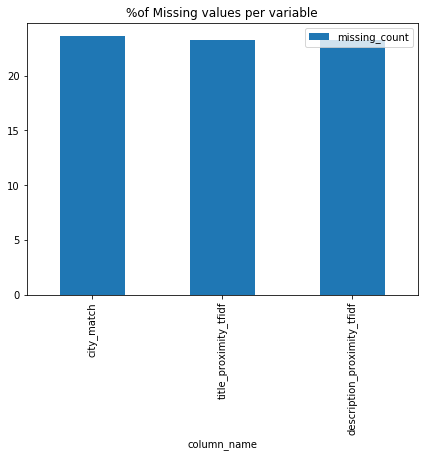

In [70]:
missing_df.plot.bar(fontsize=10, figsize=(7,5), title = "%of Missing values per variable")

In [71]:
df=df.dropna()

In [72]:
df.shape

(717574, 10)

In [93]:
df.groupby(['apply']).count()

,title_proximity_tfidf,description_proximity_tfidf,main_query_tfidf,query_jl_score,query_title_score,city_match,job_age_days,search_date_pacific,class_id
apply,,,,,,,,,
0,650514,650514,650514,650514,650514,650514,650514,650514,650514
1,67060,67060,67060,67060,67060,67060,67060,67060,67060


In [73]:
df['search_date_pacific'] = pd.to_datetime(df.search_date_pacific)
#search_date_pacific column has been converted from  object to a datetime type

In [74]:
df=df.sort_values(by='search_date_pacific', ascending=True)
df_clone=df

In [75]:
df_train = df.loc[(df['search_date_pacific'] >= '2018-01-21') & (df['search_date_pacific'] <= '2018-01-26')]
df_train.drop(['search_date_pacific', 'class_id'],axis=1,inplace=True)
df_train.tail()

,title_proximity_tfidf,description_proximity_tfidf,main_query_tfidf,query_jl_score,query_title_score,city_match,job_age_days,apply
885093,0.000000,0.000000,0.000000,0.025135,0.046694,1.0,0.0,0
642630,13.684891,0.050841,2.937206,0.013333,0.019506,1.0,7.0,0
298314,0.000000,0.000000,1.509593,0.013767,0.025706,1.0,16.0,0
298313,0.000000,0.040771,2.253558,0.020764,0.052832,0.0,3.0,0
493664,0.000000,0.242109,0.000000,0.021571,0.012048,1.0,6.0,0


In [76]:
df_train.shape

(650678, 8)

In [94]:
df_train.groupby(['apply']).count()

,title_proximity_tfidf,description_proximity_tfidf,main_query_tfidf,query_jl_score,query_title_score,city_match,job_age_days,class_id
apply,,,,,,,,
0,589622,589622,589622,589622,589622,589622,589622,589622
1,61056,61056,61056,61056,61056,61056,61056,61056


In [77]:
X_train= df_train.iloc[:,0:7]
y_train=df_train.iloc[:,7:]

In [78]:
df_test = df.loc[(df['search_date_pacific'] > '2018-01-26')]
df_test.drop(['search_date_pacific', 'class_id'],axis=1,inplace=True)
df_test.head()

,title_proximity_tfidf,description_proximity_tfidf,main_query_tfidf,query_jl_score,query_title_score,city_match,job_age_days,apply
1173384,0.000000,0.098741,1.390938,0.014517,0.043860,1.0,2.0,0
586964,0.000000,0.212966,0.000000,0.016151,0.019456,1.0,6.0,0
245274,11.284646,0.046895,3.409503,0.010133,0.014787,0.0,3.0,0
561909,18.909569,0.000000,4.070685,0.020618,0.019594,1.0,22.0,0
246654,0.000000,0.000000,2.457807,0.000001,0.007895,0.0,9.0,0


In [79]:
df_test.shape

(66896, 8)

In [95]:
df_test.groupby(['apply']).count()

,title_proximity_tfidf,description_proximity_tfidf,main_query_tfidf,query_jl_score,query_title_score,city_match,job_age_days,class_id
apply,,,,,,,,
0,60892,60892,60892,60892,60892,60892,60892,60892
1,6004,6004,6004,6004,6004,6004,6004,6004


# AUC without using Class_ID

 auc is 0.567


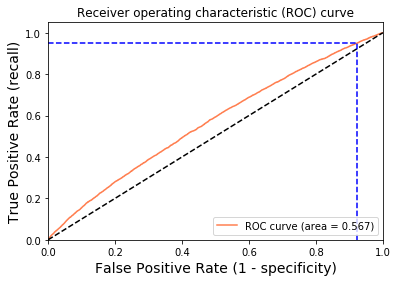

In [80]:
X_test= df_test.iloc[:,0:7]
y_test=df_test.iloc[:,7:]
logreg (X_train, X_test, y_test, y_train)

# AUC using Class_ID without normalizing it

 auc is 0.494


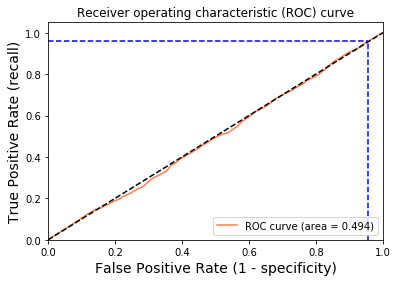

In [81]:
df_train = df_clone.loc[(df['search_date_pacific'] >= '2018-01-21') & (df['search_date_pacific'] <= '2018-01-26')]
df_train.drop(['search_date_pacific'],axis=1,inplace=True)
df_test = df_clone.loc[(df['search_date_pacific'] > '2018-01-26')]
df_test.drop(['search_date_pacific'],axis=1,inplace=True)
X_train= df_train.drop(['apply'],axis=1)
y_train=df_train['apply']
X_test= df_test.drop(['apply'],axis=1)
y_test=df_test['apply']
logreg (X_train, X_test, y_test, y_train)

# AUC after mean normalizing Class ID

In [82]:
df_clone['class_id']=(df_clone['class_id']-df_clone['class_id'].mean())/df_clone['class_id'].std()
df_train = df_clone.loc[(df['search_date_pacific'] >= '2018-01-21') & (df['search_date_pacific'] <= '2018-01-26')]
df_train.drop(['search_date_pacific'],axis=1,inplace=True)
df_test = df_clone.loc[(df['search_date_pacific'] > '2018-01-26')]
df_test.drop(['search_date_pacific'],axis=1,inplace=True)


In [83]:
X_train= df_train.drop(['apply'],axis=1)
y_train=df_train['apply']
X_test= df_test.drop(['apply'],axis=1)
y_test=df_test['apply']

 auc is 0.568


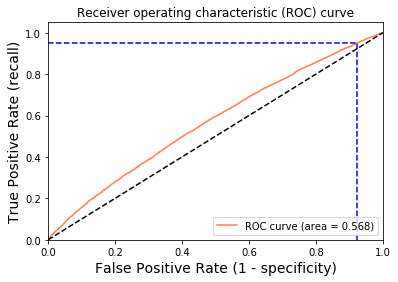

In [84]:
logreg (X_train, X_test, y_test, y_train)